In [1]:
import os
import zipfile
from xml.etree import ElementTree as ET

# Download dataset

In [2]:
# Step 1: Download the dataset
file_id = '1ngSnT3CkIcgASQvrEvcED6jWkJTNWs-S'
file_name = 'test_images.zip'
!gdown --id {file_id} -O {file_name}
!unzip {file_name}

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1ngSnT3CkIcgASQvrEvcED6jWkJTNWs-S
To: /content/test_images.zip
100% 25.4M/25.4M [00:00<00:00, 134MB/s] 
Archive:  test_images.zip
  inflating: Asirra: cat vs dogs/cat.0.jpg  
  inflating: Asirra: cat vs dogs/cat.0.xml  
  inflating: Asirra: cat vs dogs/cat.1.jpg  
  inflating: Asirra: cat vs dogs/cat.1.xml  
  inflating: Asirra: cat vs dogs/cat.10.jpg  
  inflating: Asirra: cat vs dogs/cat.10.xml  
  inflating: Asirra: cat vs dogs/cat.11.jpg  
  inflating: Asirra: cat vs dogs/cat.11.xml  
  inflating: Asirra: cat vs dogs/cat.12.jpg  
  inflating: Asirra: cat vs dogs/cat.12.xml  
  inflating: Asirra: cat vs dogs/cat.13.jpg  
  inflating: Asirra: cat vs dogs/cat.13.xml  
  inflating: Asirra: cat vs dogs/cat.14.jpg  
  inflat

# Move only cat pictures to seperate folder

In [3]:
import os
import shutil

# Specify the path to the source and destination folders
source_folder = "/content/Asirra: cat vs dogs"
destination_folder = "/content/cat"

# Create the destination folder if it doesn't exist
os.makedirs(destination_folder, exist_ok=True)

# List all files in the source folder
files = os.listdir(source_folder)

# Iterate through the files and move those starting with "cat"
for file in files:
    if file.startswith("cat"):
        source_path = os.path.join(source_folder, file)
        destination_path = os.path.join(destination_folder, file)
        shutil.move(source_path, destination_path)
        print(f"Moved {file} to {destination_folder}")

Moved cat.3561.xml to /content/cat
Moved cat.3562.jpg to /content/cat
Moved cat.3536.xml to /content/cat
Moved cat.3667.xml to /content/cat
Moved cat.3827.xml to /content/cat
Moved cat.3870.xml to /content/cat
Moved cat.3928.xml to /content/cat
Moved cat.3959.xml to /content/cat
Moved cat.3672.jpg to /content/cat
Moved cat.3851.jpg to /content/cat
Moved cat.3690.jpg to /content/cat
Moved cat.3558.jpg to /content/cat
Moved cat.3890.xml to /content/cat
Moved cat.18.xml to /content/cat
Moved cat.3720.jpg to /content/cat
Moved cat.3676.xml to /content/cat
Moved cat.3731.jpg to /content/cat
Moved cat.3537.jpg to /content/cat
Moved cat.3643.xml to /content/cat
Moved cat.3831.jpg to /content/cat
Moved cat.3852.xml to /content/cat
Moved cat.3625.jpg to /content/cat
Moved cat.3713.xml to /content/cat
Moved cat.3885.xml to /content/cat
Moved cat.43.jpg to /content/cat
Moved cat.2.jpg to /content/cat
Moved cat.16.xml to /content/cat
Moved cat.3521.xml to /content/cat
Moved cat.30.xml to /content/

# Extract Groundtruth

In [18]:
# Step 2: Function to parse XML files and extract information
def parse_xml(xml_file):
    # Parse the XML file using ElementTree
    tree = ET.parse(xml_file)
    root = tree.getroot()

    # Extract image ID from the 'filename' tag
    image_id = root.find('filename').text

    # Extract bounding box and label information for 'cat' objects
    cat_boxes = []  # List to store bounding boxes for 'cat' objects
    labels = []

    # Iterate through each 'object' tag in the XML file
    for obj in root.findall('object'):
        # Extract label from the 'name' tag inside the 'object' tag
        label = obj.find('name').text

        # Check if the label is 'cat'
        if label == 'cat':
            # Extract bounding box coordinates from the 'bndbox' tag inside the 'object' tag
            bbox = obj.find('bndbox')
            xmin = round(float(bbox.find('xmin').text))
            ymin = round(float(bbox.find('ymin').text))
            xmax = round(float(bbox.find('xmax').text))
            ymax = round(float(bbox.find('ymax').text))

            # Append bounding box coordinates to the list for 'cat' objects
            cat_boxes.append((xmin, ymin, xmax, ymax))
            labels.append(label)

    # Return the extracted information: image ID and bounding boxes for 'cat' objects
    return image_id, cat_boxes, labels


In [8]:
# Step 3: Process all XML files in the dataset
xml_folder = '/content/cat'
graound_truth  = []

for xml_file in os.listdir(xml_folder):
    if xml_file.endswith('.xml'):
        xml_path = os.path.join(xml_folder, xml_file)
        image_id, boxes, labels = parse_xml(xml_path)
        graound_truth.append({'image_id': image_id, 'boxes': boxes, 'labels': labels})


# Show an example

In [9]:
first_image_info = graound_truth[128]
print("Image ID:", first_image_info['image_id'])
print("Labels:", first_image_info['labels'])
print("Bounding Boxes:")
for box in first_image_info['boxes']:
    print(f"  - {box}")

Image ID: cat.3880.jpg
Labels: ['cat']
Bounding Boxes:
  - (123, 85, 418, 372)


Image Path: /content/cat/cat.3880.jpg


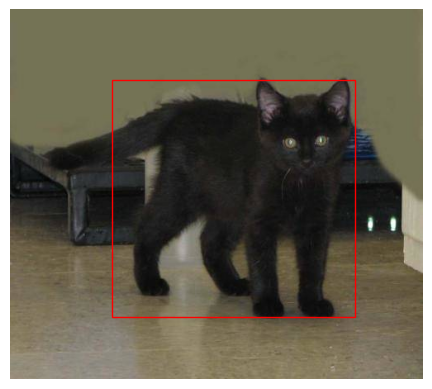

In [10]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches

image_index = 128
image_info = graound_truth[image_index]

# Load the image
image_path = os.path.join('/content/cat', image_info['image_id'])

# Print the image path for debugging
print("Image Path:", image_path)

image = cv2.imread(image_path)

# Check if the image is loaded successfully
if image is None:
    print("Error: Unable to load the image.")
else:
    # Convert BGR to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Plot the image
    fig, ax = plt.subplots(1)
    ax.imshow(image)

    # Plot bounding boxes
    for box, label in zip(image_info['boxes'], image_info['labels']):
        xmin, ymin, xmax, ymax = box
        rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=1, edgecolor='r', facecolor='none', label=label)
        ax.add_patch(rect)

    plt.axis('off')
    plt.show()


# Region proposal with Selective Search

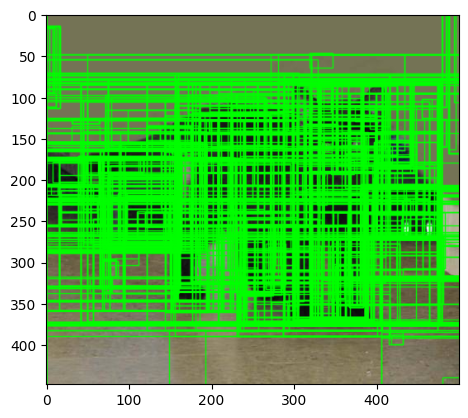

In [12]:
cv2.setUseOptimized(True);
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
ss.setBaseImage(image)
ss.switchToSelectiveSearchFast()
rects = ss.process()
imOut = image.copy()
for i, rect in (enumerate(rects)):
    x, y, w, h = rect
    cv2.rectangle(imOut, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
plt.imshow(imOut)

In [21]:
# # Function to perform Selective Search
# def selective_search(image):

#     # Create a Selective Search segmentation object
#     cv2.setUseOptimized(True);
#     ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()

#     # Set the input image for selective search
#     ss.setBaseImage(image)

#     # Switch to the fast but less accurate mode
#     ss.switchToSelectiveSearchQuality()

#     # Run selective search
#     rects = ss.process()

#     # Return the region proposals
#     return rects

def selective_search(image, max_proposals=2000):
    # Create a Selective Search segmentation object
    cv2.setUseOptimized(True)
    ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()

    # Set the input image for selective search
    ss.setBaseImage(image)

    # Switch to the fast but less accurate mode
    ss.switchToSelectiveSearchQuality()

    # Run selective search
    rects = ss.process()

    # Ensure the number of proposals does not exceed the limit
    if len(rects) > max_proposals:
        rects = rects[:max_proposals]

    # Return the region proposals
    return rects

# IOU

In [22]:
def calculate_iou(box1, box2):
    x1, y1, w1, h1 = box1
    x2, y2, w2, h2 = box2

    x_intersection = max(0, min(x1 + w1, x2 + w2) - max(x1, x2))
    y_intersection = max(0, min(y1 + h1, y2 + h2) - max(y1, y2))
    intersection = x_intersection * y_intersection

    area_box1 = w1 * h1
    area_box2 = w2 * h2
    union = area_box1 + area_box2 - intersection

    iou = intersection / union
    return iou

# crop

In [24]:
import os
import cv2
import xml.etree.ElementTree as ET
from tqdm import tqdm

# Step 1d: Crop images using region proposals and save as training images
def crop_and_save_images(image, proposals, gt_boxes, gt_labels, save_folder):
    os.makedirs(save_folder, exist_ok=True)

    positive_samples = 0
    negative_samples = 0

    for i, proposal in enumerate(proposals):

        for gt_box, gt_label in zip(gt_boxes, gt_labels):

            if gt_box:
                iou = calculate_iou(gt_box, proposal)
            else:
                iou = 0

            if iou > 0.5:
                # Positive sample
                x, y, w, h = proposal
                cropped_image = image[y:y+h, x:x+w]
                # resized_image = cv2.resize(cropped_image, (224, 224), interpolation=cv2.INTER_AREA)
                save_path = os.path.join(save_folder, f"positive_{positive_samples}.png")
                cv2.imwrite(save_path, cv2.cvtColor(cropped_image, cv2.COLOR_RGB2BGR))
                positive_samples += 1

            else:
                # Negative sample
                x, y, w, h = proposal
                cropped_image = image[y:y+h, x:x+w]
                # resized_image = cv2.resize(cropped_image, (224, 224), interpolation=cv2.INTER_AREA)
                save_path = os.path.join(save_folder, f"negative_{negative_samples}.png")
                cv2.imwrite(save_path, cv2.cvtColor(cropped_image, cv2.COLOR_RGB2BGR))
                negative_samples += 1


# Path to your dataset folder
dataset_folder = '/content/cat'

# Path to save cropped training images
save_folder = '/content/train'

# Step 1: Iterate through each image and perform the steps
for file_name in tqdm(os.listdir(dataset_folder)):
    if file_name.endswith('.xml'):
        xml_path = os.path.join(dataset_folder, file_name)
        image_id, gt_boxes, gt_labels = parse_xml(xml_path)

        # Load the corresponding image
        image_path = os.path.join(dataset_folder, image_id)
        image = cv2.imread(image_path)

        # Convert BGR to RGB
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Step 1b: Generate region proposals
        proposals = selective_search(image)

        # Step 1c: Check region proposals with ground truth values using IoU
        crop_and_save_images(image, proposals, gt_boxes, gt_labels, save_folder)

print("Cropping and saving completed.")

100%|██████████| 1100/1100 [1:17:33<00:00,  4.23s/it]

Cropping and saving completed.


# Training

In [34]:
import os
import shutil

def count_and_move_images(folder_path, positive_folder, negative_folder):
    # Initialize counters
    positive_count = 0
    negative_count = 0

    # Create positive and negative folders if they don't exist
    os.makedirs(positive_folder, exist_ok=True)
    os.makedirs(negative_folder, exist_ok=True)

    # Iterate through files in the folder
    for file_name in os.listdir(folder_path):
        if file_name.lower().endswith('.jpg') or file_name.lower().endswith('.png'):
            # Check if the filename contains 'positive' or 'negative'
            if 'positive' in file_name.lower():
                positive_count += 1
                # Move positive file to positive folder
                src_path = os.path.join(folder_path, file_name)
                dest_path = os.path.join(positive_folder, file_name)
                shutil.move(src_path, dest_path)
            elif 'negative' in file_name.lower():
                negative_count += 1
                # Move negative file to negative folder
                src_path = os.path.join(folder_path, file_name)
                dest_path = os.path.join(negative_folder, file_name)
                shutil.move(src_path, dest_path)

    return positive_count, negative_count

# Specify the paths to your folders
folder_path = '/content/train'
positive_folder = '/content/positive_samples'
negative_folder = '/content/negative_samples'

# Call the function to count and move images
positive_count, negative_count = count_and_move_images(folder_path, positive_folder, negative_folder)

# Print the results
print(f"Number of positive images: {positive_count}")
print(f"Number of negative images: {negative_count}")


Number of positive images: 15921
Number of negative images: 1099938


In [35]:
positive_count = 15921
negative_count = 1099938

total_samples = positive_count + negative_count

# Calculate class frequencies
frequency_class_0 = positive_count / total_samples
frequency_class_1 = negative_count / total_samples

# Calculate inverse of class frequencies as class weights
weight_for_class_0 = 1 / frequency_class_0
weight_for_class_1 = 1 / frequency_class_1

print("Weight for Class 0:", weight_for_class_0)
print("Weight for Class 1:", weight_for_class_1)

Weight for Class 0: 70.0872432636141
Weight for Class 1: 1.0144744521963964


# load dataset

In [ ]:
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

In [ ]:
dataset = ImageFolder(root='content/cat_dataset/', transform=transform)

In [ ]:
# Split the dataset into train and validation sets
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# Create DataLoader for training set
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=1)

# Create DataLoader for validation set
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=1)

# training loop

Epoch 0/9


100%|██████████| 793/793 [01:59<00:00,  6.63it/s]


train Loss: 0.2046 Acc: 0.9275


100%|██████████| 199/199 [00:25<00:00,  7.80it/s]


val Loss: 0.1423 Acc: 0.9513

Epoch 1/9


100%|██████████| 793/793 [02:12<00:00,  6.00it/s]


train Loss: 0.1823 Acc: 0.9374


100%|██████████| 199/199 [00:27<00:00,  7.32it/s]


val Loss: 0.1350 Acc: 0.9530

Epoch 2/9


100%|██████████| 793/793 [01:31<00:00,  8.62it/s]


train Loss: 0.1771 Acc: 0.9368


100%|██████████| 199/199 [00:35<00:00,  5.61it/s]


val Loss: 0.1332 Acc: 0.9536

Epoch 3/9


100%|██████████| 793/793 [02:03<00:00,  6.43it/s]


train Loss: 0.1756 Acc: 0.9389


100%|██████████| 199/199 [00:22<00:00,  8.97it/s]


val Loss: 0.1311 Acc: 0.9530

Epoch 4/9


100%|██████████| 793/793 [01:32<00:00,  8.57it/s]


train Loss: 0.1607 Acc: 0.9442


100%|██████████| 199/199 [00:31<00:00,  6.40it/s]


val Loss: 0.1282 Acc: 0.9549

Epoch 5/9


100%|██████████| 793/793 [01:43<00:00,  7.67it/s]


train Loss: 0.1599 Acc: 0.9437


100%|██████████| 199/199 [00:21<00:00,  9.13it/s]


val Loss: 0.1285 Acc: 0.9555

Epoch 6/9


100%|██████████| 793/793 [01:35<00:00,  8.33it/s]


train Loss: 0.1567 Acc: 0.9458


100%|██████████| 199/199 [00:36<00:00,  5.49it/s]


val Loss: 0.1287 Acc: 0.9565

Epoch 7/9


100%|██████████| 793/793 [01:47<00:00,  7.36it/s]


train Loss: 0.1587 Acc: 0.9424


100%|██████████| 199/199 [00:30<00:00,  6.44it/s]


val Loss: 0.1271 Acc: 0.9565

Epoch 8/9


100%|██████████| 793/793 [02:15<00:00,  5.84it/s]


train Loss: 0.1559 Acc: 0.9456


100%|██████████| 199/199 [00:27<00:00,  7.17it/s]


val Loss: 0.1267 Acc: 0.9558

Epoch 9/9


100%|██████████| 793/793 [01:32<00:00,  8.54it/s]


train Loss: 0.1537 Acc: 0.9462


100%|██████████| 199/199 [00:21<00:00,  9.26it/s]


val Loss: 0.1262 Acc: 0.9565



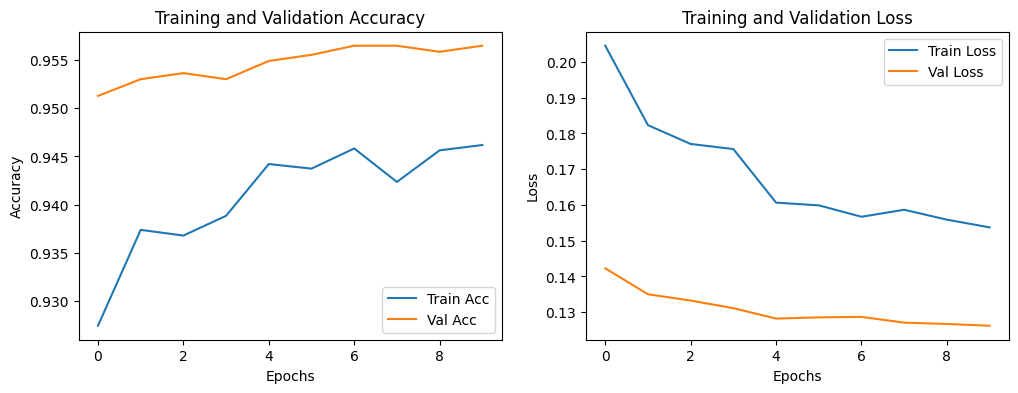

In [22]:
import torch
import torch.nn as nn
from torchvision import models
from torch import optim
from tqdm import tqdm
import matplotlib.pyplot as plt


# Assuming 'device' is defined somewhere in your code
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


# Load the pre-trained MobileNet model
model = models.mobilenet_v2(pretrained=True)

# Move the model to the device
model = model.to(device)

# Freeze all the parameters in the feature network
for param in model.features.parameters():
    param.requires_grad = False

# Move the model parameters to the same device
model = model.to(device)

# Modify the classifier for binary classification
num_features = model.classifier[1].in_features

classifier_layers = [
    nn.Dropout(0.2),
    nn.Linear(num_features, 128),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(128, 2),
    nn.Sigmoid(dim=1)
]

# Move the classifier layers to the same device
classifier = nn.Sequential(*classifier_layers).to(device)
model.classifier = classifier

# Define class weights
class_weights = torch.tensor([weight_for_class_0, weight_for_class_1], dtype=torch.float32).to(device)

# Define the criterion with class weights
criterion = nn.CrossEntropyLoss(weight=class_weights)

# Define the optimizer
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Number of training epochs
num_epochs = 10

# Lists to store history for plotting
train_loss_history = []
val_loss_history = []
train_acc_history = []
val_acc_history = []

# Training loop
for epoch in tqdm(range(num_epochs)):
    print('Epoch {}/{}'.format(epoch, num_epochs - 1))
    # Training phase
    model.train()

    running_loss = 0.0
    running_corrects = 0

    for images, labels in tqdm(train_loader):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)

        # Ensure labels are on the same device as outputs
        labels = labels.to(device)

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Statistics
        running_loss += loss.item() * images.size(0)
        _, preds = torch.max(outputs, 1)
        running_corrects += torch.sum(preds == labels.data)

    epoch_loss = running_loss / len(train_loader.dataset)
    epoch_acc = running_corrects.double() / len(train_loader.dataset)

    print(f'train Loss: {epoch_loss:.4f}, Acc: {epoch_acc:.4f}')

    # Validation phase
    model.eval()  # Set the model to evaluation mode

    with torch.no_grad():
        total_correct = 0
        total_samples = 0
        val_running_loss = 0.0

        for val_images, val_labels in tqdm(val_loader):
            val_images, val_labels = val_images.to(device), val_labels.to(device)

            val_outputs = model(val_images)
            _, predicted = torch.max(val_outputs, 1)
            total_samples += val_labels.size(0)
            total_correct += (predicted == val_labels).sum().item()

            # Calculate validation loss
            val_loss = criterion(val_outputs, val_labels)
            val_running_loss += val_loss.item() * val_images.size(0)

        val_accuracy = total_correct / total_samples
        val_epoch_loss = val_running_loss / len(val_loader.dataset)

        print(f'val Loss: {val_epoch_loss:.4f}, Acc: {val_accuracy:.4f}')

    # Save values for plotting
    train_loss_history.append(epoch_loss)
    val_loss_history.append(val_epoch_loss)
    train_acc_history.append(epoch_acc)
    val_acc_history.append(val_accuracy)

# Plot accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_acc_history, label='Train Acc')
plt.plot(val_acc_history, label='Val Acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_loss_history, label='Train Loss')
plt.plot(val_loss_history, label='Val Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Save the trained model
torch.save(model.state_dict(), 'content/model.pth')

#  Test

In [38]:
# Read the test image
img = cv2.imread('test1.jpg')

# Create a selective search segmentation object
cv2.setUseOptimized(True)
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
ss.setBaseImage(img)
ss.switchToSelectiveSearchFast()
ssresults = ss.process()

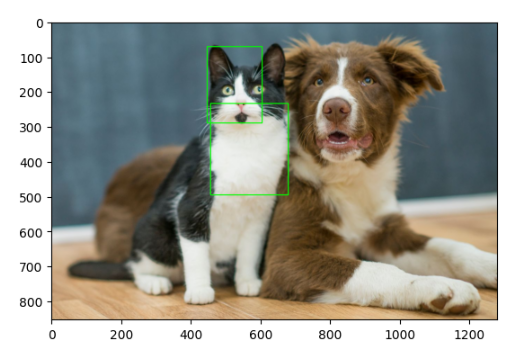

In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision.models as models
import torch.nn.functional as F
from torchvision import transforms

threshold = 0.8

for e, result in enumerate(ssresults):
    x, y, w, h = result

    timage = img[y:y+h, x:x+w]
    resized = cv2.resize(timage, (224, 224), interpolation=cv2.INTER_AREA)
    resized = np.expand_dims(resized, axis=0)
    input_tensor = torch.from_numpy(resized).permute(0, 3, 1, 2).float().to('cuda')

   # Forward pass
    with torch.no_grad():
         out = model(input_tensor)

    # Apply softmax to get probabilities
    probs = F.softmax(out[0], dim=0)

    if probs.max().item() > threshold:
          cv2.rectangle(imOut, (x, y), (x+w, y+h), (0, 255, 0), 2)

plt.figure()
plt.imshow(img)
plt.show()

In [42]:
# Read the test image
img = cv2.imread('test2.jpg')

# Create a selective search segmentation object
cv2.setUseOptimized(True)
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
ss.setBaseImage(img)
ss.switchToSelectiveSearchFast()
ssresults = ss.process()

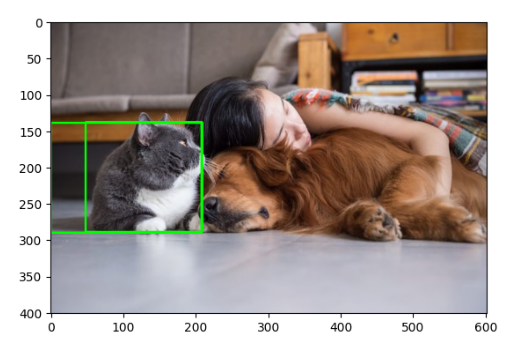

In [43]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision.models as models
import torch.nn.functional as F
from torchvision import transforms

threshold = 0.8

for e, result in enumerate(ssresults):
    x, y, w, h = result

    timage = img[y:y+h, x:x+w]
    resized = cv2.resize(timage, (224, 224), interpolation=cv2.INTER_AREA)
    resized = np.expand_dims(resized, axis=0)
    input_tensor = torch.from_numpy(resized).permute(0, 3, 1, 2).float().to('cuda')

   # Forward pass
    with torch.no_grad():
         out = model(input_tensor)

            # Apply softmax to get probabilities
    probs = F.softmax(out[0], dim=0)

    if probs.max().item() > threshold:
          cv2.rectangle(imOut, (x, y), (x+w, y+h), (0, 255, 0), 2)

plt.figure()
plt.imshow(img)
plt.show()